In [2]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

## Your First network


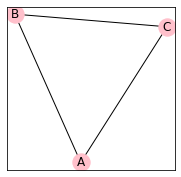

In [45]:
G1 = nx.Graph()

# add a nodes either one at a time or many at once with a list
G1.add_node('A')
G1.add_nodes_from(['B', 'C'])


# Add edges same way
G1.add_edge('A', 'B')
G1.add_edges_from([('B', 'C'), ('A', 'C')])


# Draw the network

plt.figure(figsize=(3, 3))
nx.draw_networkx(G1, node_color='pink')
plt.show()

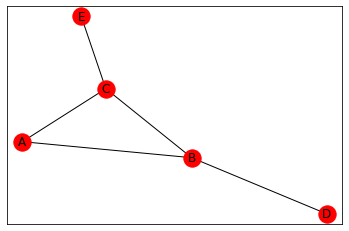

In [4]:
## you can do this in a shorter way

G1.add_edges_from([('B', 'D'), ('C', 'E')])
nx.draw_networkx(G1, node_color='red')

## Karate Club

This section will instead use one of the ready-made networks available in NetworkX: **Zachary's karate club** (Zachary, 1977).

This network represents the friendships (edges) between members (nodes) of a karate club studied between 1970 and 1972. This particular karate club has long been of interest to sociologists and network scientists, because it eventually split into two different clubs after a disagreement between the instructor and the club president. 

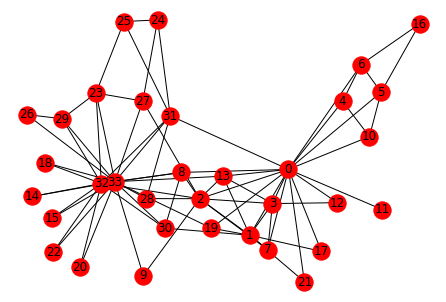

In [5]:
# load the graph
H = nx.graph
G = nx.karate_club_graph()
nx.draw(G, with_labels = True, node_color='red')

In [6]:
print(G.nodes.items)

<bound method Mapping.items of NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))>


In [7]:
len(G.nodes), len(G.edges)

(34, 78)

Another simple way to interact with a network is to check whether a particular node is present. In Zachary's paper, the node with the 0 ID was identified as the club instructor, Mr. Hi (a pseudonym). It's easy to confirm that Mr. Hi's node is part of the network using the Python in operator, or the Graph class's has_node() method, given as follows:

In [8]:
mr_hi = 0 
mr_hi in G 


G.has_node(mr_hi) 


True

Now that you know that Mr. Hi is part of the network, you can examine his friendships. Each edge connected to Mr. Hi's node represents one of his friendships. The nodes on the other end of these edges represent his friends. In general, the set of nodes that are connected to a particular node by an edge are called that node's neighbors and can be found using the neighbors() method of the Graph class. The neighbors() method returns an iterator, which is handy for most uses, but if you just want to see the neighbors, you can use the list() constructor:

In [9]:
list(G.neighbors(mr_hi)) 
[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

The president of the karate club, nicknamed John A., is represented by ID 33. The following code checks whether he and Mr. Hi are friends:

In [10]:
john_a = 33 
(mr_hi, john_a) in G.edges 
False 
G.has_edge(mr_hi, john_a) 
False

False

## Betweeness Centrality 

In social networks, online and offline, the individuals who connect different parts of the network have the greatest ability to filter, amplify, and alter information. Such individuals are called **brokers**, while edges that span distant parts of a network are called **bridges**. The importance of such nodes and edges isn't limited to social networks. In flow networks—such as railroads, water pipes, and telecommunications systems—nodes connecting distant parts of a network can act as **bottlenecks**, limiting the amount of flow. 

Identifying such bottlenecks makes it possible to increase their capacity and protect them from failures and attacks. Bridges and brokers are important because they stand between different parts of a network. Accordingly, the type of centrality used to identify bridges and brokers is called **betweenness centrality.**

Betweenness centrality is based on the assumption that the greater the number of shortest paths pass through a node (or edge), the more it acts as a broker (or bridge). 

NetworkX makes is easy to calculate betweeness centrality. See below. 

In [11]:
betweenness = nx.betweenness_centrality(G, normalized=False)
sorted(betweenness.items(), key=lambda x:x[1], reverse=True)[0:10]

[(0, 231.0714285714286),
 (33, 160.5515873015873),
 (32, 76.69047619047619),
 (2, 75.85079365079366),
 (31, 73.00952380952378),
 (8, 29.529365079365082),
 (1, 28.478571428571424),
 (13, 24.215873015873015),
 (19, 17.1468253968254),
 (5, 15.833333333333334)]

In [12]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

## Girvan Newman




In [13]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [14]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

In [15]:
node_groups

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]

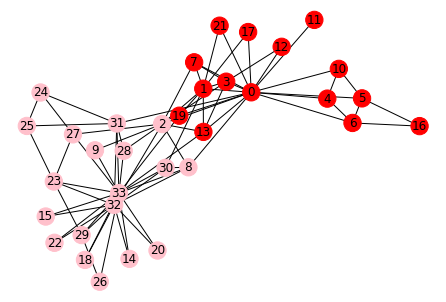

In [16]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('red')
    else: 
        color_map.append('pink')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

## Preferential Attachment and Heavy Tailed Networks

Many networks are characterized by a few nodes with many connections and many nodes with very few connections. 

There are many ways to generate these type of networks but one fo the most widely used is the Barabasi-Albert preferential attachment model.  This model mimics processes where the rich get richer.  Every time a node is added, it is randomly connected to existing nodes, with high degree nodes being more likely. 


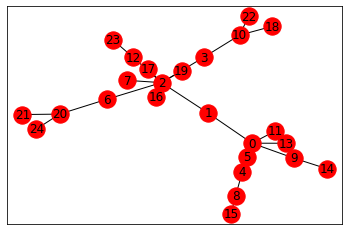

In [17]:
# In NetworkX, the barabasi_albert_graph()  
# generates preferential attachment networks.

G_preferential_35 = nx.barabasi_albert_graph(25, 1)
pos = nx.spring_layout(G_preferential_35, k=0.1)
nx.draw_networkx(G_preferential_35, pos, node_color='red')

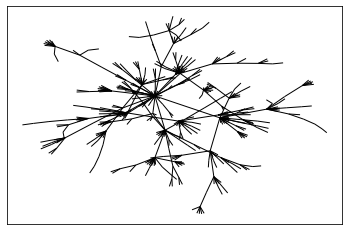

In [18]:
# The structure is more apparent with more nodes
G_preferential_500 = nx.barabasi_albert_graph(500, 1)
pos = nx.spring_layout(G_preferential_500)
nx.draw_networkx(G_preferential_500, pos, node_size=0, with_labels=False)


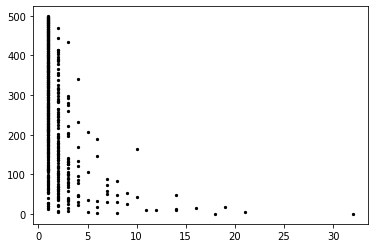

In [19]:
degrees = []
nodes = []

for n in G_preferential_500.nodes():
  degrees.append(G_preferential_500.degree(n))
  nodes.append(n)

plt.scatter(degrees, nodes, s = 5, color = "black")
plt.show()

Now your turn. Tell me something **interesting** about this network. 



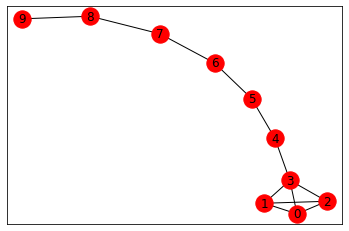

In [36]:
G2 = nx.lollipop_graph(4, 6)
nx.draw_networkx(G2, node_color='red')

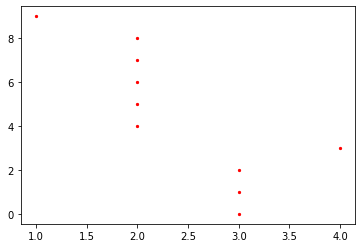

In [43]:
degrees = []
nodes = []

for n in G2.nodes():
  degrees.append(G2.degree(n))
  nodes.append(n)

plt.scatter(degrees, nodes, s = 5, color = "red")
plt.show()

In [30]:
betweenness = nx.betweenness_centrality(G2, normalized=False)
print(betweenness)

{0: 0.0, 1: 0.0, 2: 0.0, 3: 18.0, 4: 20.0, 5: 20.0, 6: 18.0, 7: 14.0, 8: 8.0, 9: 0.0}


In [42]:
closeness = nx.closeness_centrality(G2)
print(closeness)

{0: 0.3, 1: 0.3, 2: 0.3, 3: 0.375, 4: 0.4090909090909091, 5: 0.4090909090909091, 6: 0.375, 7: 0.32142857142857145, 8: 0.2647058823529412, 9: 0.21428571428571427}


Something interesting about the lollipop graph is that the graph always has an cyclic main portion nodes 0 to 3. The number of total nodes has to with the size of the cyclic portion and the size of the tail. In this example the cyclic portion is 4 and the tail portion is 6. The total number of nodes is 4 + 6. Using closeness centrality fucntion we get that node 4 and 5 is right at the center from the rest of the nodes. 